# Quality Assessment for ERA5 Drought Indicator

Production date: DD-MM-YYYY

*Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.*

Produced by: C3S2521 

## 🌍 Use case: Use case listed here in full 

## ❓ Quality assessment question
* **In most cases there should be one question listed here in bold**
* **(In some cases a second related/follow-up question may be included)**

**‘Context paragraph’ (no title/heading)** - a very short introduction before the assessment statement describing approach taken to answer the user question. One or two key references could be useful,  if the assessment summarises literature . These can be referenced directly in the text, like `[Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2)` giving: [Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2). For major references numerical labels like this should be used (which should also listed at the end) `Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2))`giving: Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2)). Please use DOI links where possible.


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

A ‘free text’ introduction to the data analysis steps or a description of the literature synthesis, with a justification of the approach taken, and limitations mentioned. **Mention which CDS catalogue entry is used, including a link, and also any other entries used for the assessment**.

Followed by a numbered list of the methodology and results, with the same headings as the sections under ‘Analysis and Results’. These should be links to the sections below, using the format `[](section-label)`. The title of the section will be automatically populated, so no need to repeat the title of the section when referecing it like this.

```{note}
The section labels for the links need to be manually set, as seen below (`(section-1)=`, followed by the heading). These labels will be shown in GitHub but will not appear when the Jupyter Book page is built.
```

* These headings can be specific to the quality assessment, and help guide the user through the ‘story’ of the assessment. This means we cannot pre-define the sections and headings here, as they will be different for each assessment.
* Sub-bullets could be used to outline what will be done/shown/discussed in each section
* The list below is just an example, or may need more or fewer sections, with different headings

E.g. 'The analysis and results are organised in the following steps, which are detailed in the sections below:' 

**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### 1. Section 1 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (**if code is included** - some assessment may review literature or reports like PQARs for ECVs, in which case, a markdown file could be provided instead). Note that some details may be better placed in code comments, rather than in the text above the code cell, to help the flow of the Notebook.

**Code:**

* Cell output should be cleaned up as needed (right click the cell after it has run and delete the output if needed), this can also be done with the `'hide-output'` cell tag, added under 'Common Tools -> Cell Tags' on the right in Jupyter Lab (under the cog icon).
* Please consider when cell output would be useful to include, such as printing the summary of the xarray data cube, or an example image. 
* Please link to any non-standard libraries in the references, including the functions from B-Open (a standard line on this is included in the references section).
* The code cells will be adjusted to be 'collapsed by default' when the Jupyter Book page is built.

In [255]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd
import warnings

# General data handling
import numpy as np
import pandas as pd
import xarray as xr
from functools import partial

# Visualisation
import earthkit.plots as ekp
from earthkit.plots.styles import Style
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"
from tqdm import tqdm  # Progress bars

# Visualisation in Jupyter book -- automatically ignored otherwise
try:
    from myst_nb import glue
except ImportError:
    glue = None

import calendar
import earthkit.data
import scipy.stats as stats    

(section-2)=
### ERA5-Drought SPI

#### Reading in data from ERA5-Drought
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

#### Using Earthkit for plotting.

In [ ]:
global_map = data_drought.sel(time="2023-08-01")
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_map, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

# Play around with the ensemble members- how to calculate standard uncertainty between all?
# Creating a filtering function? Say if you wanted to select a range of longitudes and latitudes.
# Creating an animated gif with ensemble members? A slider?

In [ ]:
# Try timeseries for a subset of time.

# time_series = data_drought.sel(time = ["2023-01-01","2023-12-31"],lat=51.5, lon=0.0, method="nearest") # Only plots two datapoints.

time_series = data_drought.sel(lat=25, lon=0.0, method="nearest")
time_series["pzero"].plot.line() 
time_series = data_drought.sel(time="2023-01-01",method="nearest")
global_mean = time_series["SPEI1"].mean() # Global mean has been successfully computed, but it's still a lazy Dask array
print(global_mean.compute()) # Triggers to print computation.
time_series["SPEI1"].plot.pcolormesh() # Why did I need to squeeze the dimension here? -> because there can be multiple measurements in a day.

# Yearly average at each pixel.
global_mean = data_drought["SPEI12"].mean("time") # Calculates mean along time axis.
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_mean, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

#### Calculating SPI



#### Read in total precipitation data (monthly) from ERA5 analysis. 
##### (https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)

In [4]:
lat = 9.25
lng = 40.5 # Ethiopia
variable = "total_precipitation"
date_range = ["1940-01-01T06:00:00.000000000", "2020-12-31T06:00:00.000000000"]

In [ ]:
variable = "total_precipitation"
date_range = ["1940-01-01T06:00:00.000000000", "2020-12-31T06:00:00.000000000"]

In [94]:
def retrieve_tp_data(variable, date_range, lat, lng):
    # Define the dataset and request parameters
    dataset = "reanalysis-era5-single-levels-timeseries"
    request = {
        "variable": [
        variable,  # Variable to retrieve
        ],
        "date": date_range,  # Date range for the data
        "location": {"longitude": lng, "latitude": lat},  # Location coordinates
        "data_format": "netcdf"  # Format of the retrieved data
    }

    # Use "earthkit" to retrieve the data
    ekds = earthkit.data.from_source(
        "cds", dataset, request
    ).to_xarray()

    return ekds
    
data = retrieve_tp_data(variable, date_range, lat, lng)
data_shifted = data.assign_coords(valid_time=data.valid_time - np.timedelta64(6, 'h'))

# data = data.groupby(data.valid_time.dt.month).mean(dim='valid_time') 
# data['valid_time'] = data.indexes['valid_time'].to_datetimeindex()
# data = data.sel(valid_time=data.valid_time.dt.hour == 6)
# data.sel(valid_time= slice('2010-01-01T06:00:00.000000000','2010-01-04T18:00:00.000000000'))

In [111]:
# Make a function to compute the monthly precipitation climatology
def precipMonthly(data):
    """
    Calculate the monthly climatology of precipitation.

    This function reads precipitation data from a NetCDF file,
    converts the time coordinate to a pandas datetime index,
    and then resamples the data to calculate the monthly 
    climatology. The resulting climatology is returned in millimeters.

    Returns:
        pandas.DataFrame: A DataFrame containing the monthly climatology
        of precipitation in millimeters, indexed by month.
    """

    data_tp_pt = data.tp # Accessing total precipitation.

    # Convert the time coordinate to a pandas datetime index
    time_index = pd.to_datetime(data_tp_pt.valid_time.values)

    # Create a DataFrame for easier manipulation
    df = pd.DataFrame(data_tp_pt.values*1000, index=time_index, columns=['tp (mm)'])
    df_monthly = df.resample('MS').sum() # .gives monthly totals by summing precipitation within each month.
    # df_monthly_shifted = df.resample('MS').apply(lambda x: (x.index[0], x.index[-1]))
    
    df_monthly['month'] = df_monthly.index.month # Extracts the month number (1–12) from the index and adds it as a column.
    monthly_climatology = df_monthly.groupby('month').mean()

    # Get the actual lat/lon used
    nearest_lat = data_tp_pt.latitude.values
    nearest_lng = data_tp_pt.longitude.values

    return df_monthly, monthly_climatology, nearest_lat, nearest_lng

# Call our function
df_monthly, clim, nearest_lat, nearest_lng = precipMonthly(data)
df_monthly_shifted, clim_shifted, nearest_lat_shifted, nearest_lng_shifted = precipMonthly(data_shifted)

# df_monthly-df_monthly_shifted

#### Calculate moving average for different accumulation periods.

In [256]:
acc_periods = [1, 3, 6, 12, 24, 36, 48]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid')

# Does xarray have a moving window.

def moving_window(acc_periods,df_monthly):
    for period in acc_periods:
        x = df_monthly['tp (mm)'].values
        conv_result = moving_average(x,period)  # rolling accumulation window. 
        
        # Create an array of full length with NaNs
        aligned = np.full(len(df_monthly), np.nan)
        
        # Place convolution result starting at index period-1
        aligned[period-1:] = conv_result
        
        df_monthly[f"Accumulation-{period} months"] = aligned
    return df_monthly
        
df_monthly = moving_window(acc_periods,df_monthly)
df_monthly_shifted = moving_window(acc_periods,df_monthly_shifted)


#### Plot of accumulation periods (1 to 48) months

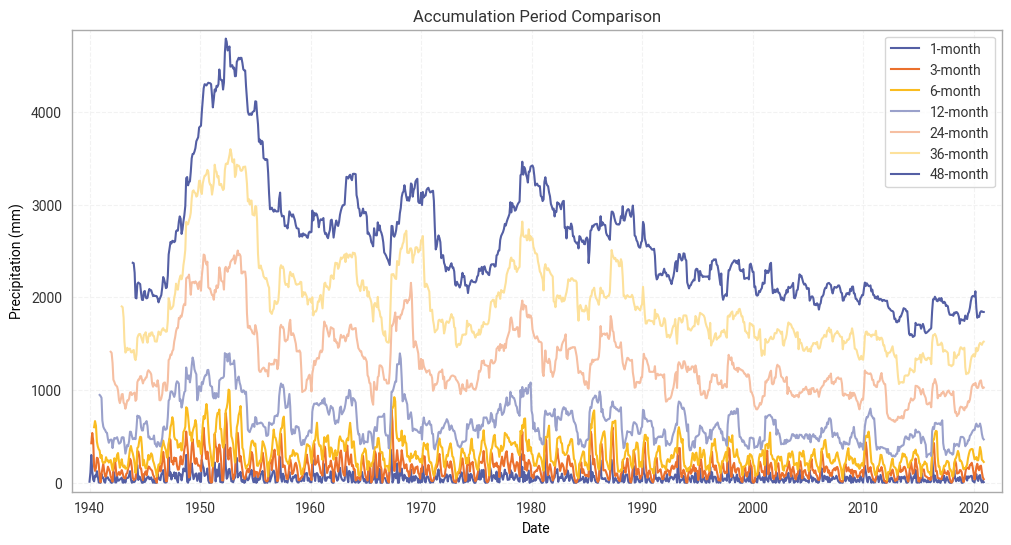

In [258]:
plt.figure(figsize=(12, 6))
for period in acc_periods:
    plt.plot(df_monthly.index, df_monthly_shifted[f"Accumulation-{period} months"], label=f"{period}-month")
plt.title("Accumulation Period Comparison")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.show()

#### Fitting gamma distribution to different accumulation periods.

In [259]:
acc_periods = [1,3,6,12,24,36,48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

# Dictionary to store fitted parameters for each period
gamma_params = {}

def fit_gamma_distributions(df, acc_periods, start_ref, end_ref):
    
    # Function to fit gamma distribution on any precipitation dataframe.
    for period in acc_periods:
        reference_data = df.loc[start_ref:end_ref, f"Accumulation-{period} months"].dropna()
        alpha, loc, beta = stats.gamma.fit(reference_data)
        gamma_params[period] = (alpha, loc, beta)
    return gamma_params # returns the gamma paramaters, associated with that period.

def spi_norm_ppf(df, acc_periods):
    spi_df  = pd.DataFrame(index=df.index)
    for period in acc_periods:
        data = df[f"SPI-{period}"]
        # Convert to standard normal
        spi = stats.norm.ppf(data, loc=0, scale=1)
        spi_df[f"SPI-{period}"] = spi
    return spi_df # returns SPI df series.

def compute_spi_series(df, acc_periods, gamma_params): 
    # Function to compute SPI time series from dataframe, period and gamma parameters.
    spi_df = pd.DataFrame(index=df.index)
    pdf_df = pd.DataFrame(index=df.index) 
    cdf_df = pd.DataFrame(index=df.index) 
    for period in acc_periods:
        alpha, loc, beta = gamma_params[period]
        data = df[f"Accumulation-{period} months"]
        
        pdf_values = stats.gamma.pdf(data, a=alpha, loc=loc, scale=beta)
        cdf_values = stats.gamma.cdf(data, a=alpha, loc=loc, scale=beta)
        spi_values = stats.norm.ppf(stats.gamma.cdf(data, a=alpha, loc=loc, scale=beta),loc=0, scale=1)
        
        spi_df[f"SPI-{period}"] = spi_values
        pdf_df[f"SPI-{period}"] = pdf_values
        cdf_df[f"SPI-{period}"] = cdf_values
    return spi_df, pdf_df, cdf_df # returns SPI times series.

def compute_spi(value, acc_period):
    # Function to compute SPI for any tp value in any period.
    alpha, loc, beta = gamma_params[acc_period]
    # Compute CDF under gamma
    cdf = stats.gamma.cdf(value, a=alpha, loc=loc, scale=beta)
    # Convert to standard normal
    spi = stats.norm.ppf(cdf, loc=0, scale=1)
    return spi # returns SPI single value.

def get_spi_for_month(spi_df, date, acc_period):
    # Function to return SPI for any month in any accumulation period.
    return spi_df.loc[date, f"SPI-{acc_period}"]

def plot_spi_series(spi_series, acc_periods):
    # Function to plot SPI series.
    plt.figure(figsize=(12, 6))
    for period in acc_periods:
        plt.plot(spi_series.index, spi_series[f"SPI-{period}"], label=f"SPI-{period}")
    plt.legend()
    plt.title("Standardized Precipitation Index")
    plt.ylim([-10, 10])
    plt.xlabel("Date")
    plt.ylabel("SPI Value")
    plt.grid(True)
    plt.show()

def compute_spi_tp(spi_df,acc_periods, gamma_params):
    # Function to compute the SPI vs tp.
    spi_results = {}
    pdf_spi_values = {}
    cdf_spi_values = {}
    
    for period in acc_periods:
        col_name = f"SPI-{period}"
        data = spi_df[col_name]
        x = np.linspace(0, 5000, 400)
        alpha, loc, beta = gamma_params[period]
        
        pdf_spi_values[period] = stats.gamma.pdf(x, a=alpha, loc=loc, scale=beta)
        cdf_spi_values[period] = stats.gamma.cdf(x, a=alpha, loc=loc, scale=beta)
        spi_values = stats.norm.ppf(stats.gamma.cdf(x, a=alpha, loc=loc, scale=beta),loc=0, scale=1)
        
        spi_results[period] = (spi_values) 
        
    return spi_results, pdf_spi_values, cdf_spi_values # returns SPI results as dictionary with period.

def plot_spi_tp(spi_tp, acc_periods):
    plt.figure(figsize=(12, 6))
    for period in acc_periods:
        plt.plot( spi_tp[period], label=f"SPI-{period}")
    plt.legend()
    plt.title("Standardized Precipitation Index")
    plt.xlabel("Total Precipitation (mm)")
    plt.ylabel("SPI Value")
    plt.ylim([-10,10])
    plt.grid(True)
    plt.show()

# Look at ensemble for uncertainty.
# Calculating the SPEI too.
# Visual comparison of differences test at multiple locations.
# Look at the quality test.
# The zero precipitation adjustment.
# Look at the ensemble. 
# Plot of uncertainty in precipitation in x axis and uncertainty in SPI in y axis for ensemble.
# How does uncertainty in reference period affect uncertainty in SPI.- all the same for SPEI.

In [ ]:
# 1. Fit gamma distributions
gamma_params = fit_gamma_distributions(df_monthly, acc_periods, start_ref, end_ref)
gamma_params_shifted = fit_gamma_distributions(df_monthly_shifted, acc_periods, start_ref, end_ref)
# 2. Compute SPI DataFrame
spi_df, pdf_spi_series, cdf_spi_series = compute_spi_series(df_monthly, acc_periods, gamma_params)
spi_df_shifted, pdf_spi_series_shifted, cdf_spi_series_shifted = compute_spi_series(df_monthly_shifted, acc_periods, gamma_params_shifted)

# 2.1 Compute SPI vs tp curve
spi_tp, pdf_spi_tp, cdf_spi_tp = compute_spi_tp(spi_df, acc_periods, gamma_params)
spi_tp_shifted, pdf_spi_tp_shifted, cdf_spi_tp_shifted = compute_spi_tp(spi_df_shifted, acc_periods, gamma_params_shifted)

# 3. Plot SPI time series
plot_spi_series(spi_df, acc_periods)
plot_spi_series(spi_df_shifted, acc_periods)

# 4. Plot SPI precipitation curve
plot_spi_tp(spi_tp, acc_periods)

# 5. Query SPI for a specific month
spi_value = get_spi_for_month(spi_df, "2003-07-01", 1)

#### Locations with zero precipitation months.

##### Calculating historical ratio of months without precipitation and finding zero adjusted SPI - GOOD WAY

In [260]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]
df_monthly_shifted

def zero_precip(df, cdf_spi_series, accum_periods):
    # Initialize DataFrame for adjusted CDF
    cdf_adjusted_series = pd.DataFrame(index=df.index)
    
    # Compute zero-precip stats and adjusted CDF in one loop
    stats_summary = {}
    month_counts = {m: {f"SPI-{p}": 0 for p in accum_periods} for m in range(1, 13)}  # month: {SPI-period: count}
    
    df_ref = df[(df.index >= "1991-01-01") & (df.index <= "2020-12-01")]
    
    for period in accum_periods:
        col = f"Accumulation-{period} months"
        spi_col = f"SPI-{period}"
        
        # Calculate zero-precip count and total months
        n_zero = (df_ref[col] < 0.1).sum()
        n_month = df_ref[col].count()
            
        # Probability of zero precipitation
        p_zero = (n_zero+1) / (2*(n_month + 1))      
        
        # Adjusted CDF
        cdf_adjusted_series[spi_col] = p_zero + (1 - p_zero) * cdf_spi_series[spi_col]
        
        # Store summary stats
        stats_summary[spi_col] = {
            "Zero-Precip Count": int(n_zero),
            "Total Months": int(n_month),
            "Prob Zero Precip": p_zero
        }
    
        # Count per month for values < 0.1
        for idx, val in df_ref[col].items():
            if val < 0.1:
                month_counts[idx.month][spi_col] += 1
    
    
    # Convert month_counts to a DataFrame for readability
    month_counts_df = pd.DataFrame(month_counts).T
    
    month_counts_df.index = [
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ]
    
    stats_summary_df = pd.DataFrame(stats_summary).T
    
    # Convert summary to DataFrame for easy viewing
    zero_prep_stats_df = pd.DataFrame(month_counts_df)

    return stats_summary_df, zero_prep_stats_df, cdf_adjusted_series
    
# spi_series_adjusted_old = spi_norm_ppf(cdf_adjusted_series, acc_periods) # inverse norm for zero precipitation adjusted.
stats_df_shifted, zero_df_shifted, cdf_adjusted_series_shifted = zero_precip(df_monthly_shifted,cdf_spi_series_shifted,accum_periods)
spi_series_adjusted_shifted = spi_norm_ppf(cdf_adjusted_series_shifted, accum_periods) # inverse norm for zero precipitation adjusted.

stats_df, zero_df, cdf_adjusted_series = zero_precip(df_monthly,cdf_spi_series,accum_periods)
spi_series_adjusted = spi_norm_ppf(cdf_adjusted_series, accum_periods) # inverse norm for zero precipitation adjusted.

# # plot_spi_series(spi_series_adjusted, acc_periods) # plot adjusted 
# plot_spi_series(spi_series_adjusted_old-spi_df, acc_periods) # plot non adjusted

#### Probability of zero precipitation.

In [261]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["probability_of_zero_precipitation_spi"],
    "accumulation_period": [
        "1",
        "6",
        "48",
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ]
}

In [262]:
era5_zero_precip = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
era5_zero_precip = era5_zero_precip.to_xarray(compat="equals") # Converts to xarray.

2025-11-14 15:16:18,407 WARNING [2025-10-30T00:00:00] Downloading data from this dataset requires that the user be registered with the CDS. The use of the API requires a CDS API key.
2025-11-14 15:16:18,410 INFO Request ID is ab0ef689-c6dd-464a-b3b1-bb9be73a30ce
2025-11-14 15:16:18,488 INFO status has been updated to accepted
2025-11-14 15:16:32,065 INFO status has been updated to running
2025-11-14 15:16:51,593 INFO status has been updated to successful
                                                                                                                                     

In [ ]:
era5_zero_precip.sel(lat=9.25, lon= 40.5).compute()
# era5_zero_precip["pzero"].compute()

#### Check calculated SPI against given (one location).

In [224]:
dataset = "derived-drought-historical-monthly"

request1 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}

request2 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1981", "1982", "1983",
        "1984", "1985", "1986",
        "1987", "1988", "1989",
        "1990", "1991", "1992",
        "1993", "1994", "1995",
        "1996", "1997", "1998",
        "1999", "2000", "2001",
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75] # Ethiopia
}

In [225]:
data_drought = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
data_drought = data_drought.to_xarray(compat="equals") # Converts to xarray.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 149.26it/s]
/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/earthkit/data/readers/netcdf/fieldlist.py:202: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  return xr.open_mfdataset(


In [ ]:
data_drought

In [ ]:
data_drought = data_drought.sel(lat=9.25,lon=40.5, method="nearest")

In [265]:
def calculated_spi_to_xarray(df):
    """
    Convert a pandas DataFrame of SPI values into an xarray Dataset.

    Args:
        df (pandas.DataFrame): DataFrame with columns like SPI-1, SPI-3, ..., SPI-48
                               and datetime index.

    Returns:
        xarray.Dataset: Dataset with dimensions (time) and variables for each SPI period.
    """

    # Create a dictionary of variables for xarray
    data_vars = {}
    for col in df.columns:
        var_name = col.replace("-","") 
        data_vars[var_name] = (["time"], df[col].values)

    # Build the Dataset
    ds = xr.Dataset(
        data_vars=data_vars,
        coords={"time": df.index}
    )

    
    # Add 6 hours to all time coordinates otherwise they don't match!
    ds['time'] = ds['time'] + np.timedelta64(6, 'h')

    return ds

spi_calculated_shifted = calculated_spi_to_xarray(spi_series_adjusted_shifted)
spi_calculated = calculated_spi_to_xarray(spi_series_adjusted)

In [ ]:
# spi_calculated, data_drought = xr.align(spi_calculated, data_drought, join="inner")  # keep only matching times
# result = (spi_calculated - data_drought).compute()
# data_drought

In [ ]:
plt.figure(figsize=(12, 6))
acc_periods=[12]
for period in acc_periods:
    shifted_diff = spi_calculated_shifted[f"SPI{period}"]-data_drought[f"SPI{period}"].dropna(dim='time')
    diff = spi_calculated[f"SPI{period}"]-data_drought[f"SPI{period}"].dropna(dim='time')

    median_diff_no_shift = np.median(diff)
    median_abs_diff_no_shift = np.median(np.abs(diff))
    
    median_diff_shifted = np.median(shifted_diff)
    median_abs_diff_shifted = np.median(np.abs(shifted_diff))

    plt.plot(diff, label=f"No time shifting Calculated-SPI{period}")
    plt.plot(shifted_diff, label=f"6-hr time shifted Calculated-SPI{period}")
    
    # Add median difference lines
    plt.axhline(median_diff_no_shift, color='blue', linestyle='--', label=f"Median Diff No Shift: {median_diff_no_shift:.5f}")
    plt.axhline(median_diff_shifted, color='orange', linestyle='--', label=f"Median Diff Shifted: {median_diff_shifted:.5f}")

    # Add median absolute difference lines (optional, different style)
    plt.axhline(median_abs_diff_no_shift, color='blue', linestyle=':', label=f"Median Abs Diff No Shift: {median_abs_diff_no_shift:.5f}")
    plt.axhline(median_abs_diff_shifted, color='orange', linestyle=':', label=f"Median Abs Diff Shifted: {median_abs_diff_shifted:.5f}")

    # plt.plot(data_drought[f"SPI{period}"], label=f"ERA5 Drought-SPI{period}")

    # plt.plot(spi_calculated[f"SPI{period}"],  label=f"Calculated-SPI{period}")
    # plt.plot(data_drought[f"SPI{period}"], label=f"ECMWF-SPI{period}")

plt.legend()
plt.title("Standardised Precipitation Index Difference in SPI12")
plt.xlabel("Date")
plt.ylabel("SPI Value")
plt.grid(True)
plt.show()

#### Calculating SPI- Ensemble

In [ ]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["ensemble_members"],
    "dataset_type": "consolidated_dataset",
    "data_format": "netcdf",
    "year": [
        "1980", "1981", "1982",
        "1983", "1984", "1985",
        "1986", "1987", "1988",
        "1989", "1990", "1991",
        "1992", "1993", "1994",
        "1995", "1996", "1997",
        "1998", "1999", "2000",
        "2001", "2002", "2003",
        "2004", "2005", "2006",
        "2007", "2008", "2009",
        "2010", "2011", "2012",
        "2013", "2014", "2015",
        "2016", "2017", "2018",
        "2019", "2020", "2021"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}


In [ ]:
data_drought_ens = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
data_drought_ens = data_drought.to_xarray(compat="equals") # Converts to xarray.

In [ ]:
data_drought_ens = data_drought_ens.sel(lat=9.25,lon=40.5, method="nearest")
data_drought_ens

(section-3)=
### 3. Section 3 title
#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [ ]:
# collapsable code cells

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-4)=
### 4. Section 4 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does(if code is included).

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-5)=
### 5. Section 5 title 

#### Results Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included). 

If this is the **results section**, we expect the final plots to be created here with a description of how to interpret them, and what information can be extracted for the specific use case and user question. The information in the 'quality assessment statement' should be derived here. 

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.